## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import Normalize
import matplotlib.animation as animation
import seaborn as sns
from IPython.core.display import HTML

# import openslide
%matplotlib inline

#### The dataset was created in a project that aims to contribute to the reduction of academic dropout and failure in higher education, by using machine learning techniques to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place. 

Attribute Name	Description	Units	
* Marital Status 	
                     1 – single 
                     2 – married 
                     3 – widower 
                     4 – divorced 
                     5 – facto union 
                     6 – legally separated		

* Application mode	 
                     1 - 1st phase - general contingent
                     2 - Ordinance No. 612/93  
                     5 - 1st phase - special contingent (Azores Island) 
                     7 - Holders of other higher courses 
                     10 - Ordinance No. 854-B/99 
                     15 - International student (bachelor) 
                     16 - 1st phase - special contingent (Madeira Island) 
                     17 - 2nd phase - general contingent 
                     18 - 3rd phase - general contingent 
                     26 - Ordinance No. 533-A/99, item b2) (Different Plan) 
                     27 - Ordinance No. 533-A/99, item b3 (Other Institution) 
                     39 - Over 23 years old 
                     42 - Transfer 
                     43 - Change of course 
                     44 - Technological specialization diploma holders 
                     51 - Change of institution/course 
                     53 - Short cycle diploma holders 
                     57 - Change of institution/course (International)	

* Application order		
                     Application order (between 0 - first choice; and 9 last choice)		
                     
* Course            
                    33 - Biofuel Production Technologies 
                    171 - Animation and Multimedia Design 
                    8014 - Social Service (evening attendance) 
                    9003 - Agronomy 
                    9070 - Communication Design 
                    9085 - Veterinary Nursing 
                    9119 - Informatics Engineering 
                    9130 - Equinculture 
                    9147 - Management 
                    9238 - Social Service 
                    9254 - Tourism 
                    9500 - Nursing 
                    9556 - Oral Hygiene 
                    9670 - Advertising and Marketing Management 
                    9773 - Journalism and Communication 
                    9853 - Basic Education 
                    9991 - Management (evening attendance)
                    
* Daytime/evening attendance 
                     1 – daytime
                     0 - evening
 
* Previous qualification
                     1 - Secondary education 
                     2 - Higher education - bachelor's degree 
                     3 - Higher education - degree 
                     4 - Higher education - master's 
                     5 - Higher education - doctorate 
                     6 - Frequency of higher education 
                     9 - 12th year of schooling - not completed 
                     10 - 11th year of schooling - not completed 
                     12 - Other - 11th year of schooling 
                     14 - 10th year of schooling 
                     15 - 10th year of schooling - not completed 
                     19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 
                     38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 
                     39 - Technological specialization course 
                     40 - Higher education - degree (1st cycle) 
                     42 - Professional higher technical course 
                     43 - Higher education - master (2nd cycle)
               
* Previous qualification (grade)
                     Grade of previous qualification (between 0 and 200)
                     
* Nacionality	
                     1 - Portuguese; 
                     2 - German; 
                     6 - Spanish; 
                     11 - Italian; 
                     13 - Dutch; 
                     14 - English; 
                     17 - Lithuanian; 
                     21 - Angolan; 
                     22 - Cape Verdean; 
                     24 - Guinean; 
                     25 - Mozambican; 
                     26 - Santomean; 
                     32 - Turkish; 
                     41 - Brazilian; 
                     62 - Romanian; 
                     100 - Moldova (Republic of); 
                     101 - Mexican; 
                     103 - Ukrainian; 
                     105 - Russian; 
                     108 - Cuban; 
                     109 - Colombian
                     
* Mother's qualification / Father's qualification	
                    1 - Secondary Education - 12th Year of Schooling or Eq. 
                    2 - Higher Education - Bachelor's Degree 
                    3 - Higher Education - Degree 
                    4 - Higher Education - Master's 
                    5 - Higher Education - Doctorate 
                    6 - Frequency of Higher Education 
                    9 - 12th Year of Schooling - Not Completed 
                    10 - 11th Year of Schooling - Not Completed 
                    11 - 7th Year (Old) 
                    12 - Other - 11th Year of Schooling 
                    14 - 10th Year of Schooling 
                    18 - General commerce course 
                    19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 
                    22 - Technical-professional course 
                    26 - 7th year of schooling 
                    27 - 2nd cycle of the general high school course 
                    29 - 9th Year of Schooling - Not Completed 
                    30 - 8th year of schooling 
                    34 - Unknown 
                    35 - Can't read or write 
                    36 - Can read without having a 4th year of schooling 
                    37 - Basic education 1st cycle (4th/5th year) or equiv. 
                    38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 
                    39 - Technological specialization course 
                    40 - Higher education - degree (1st cycle) 
                    41 - Specialized higher studies course 
                    42 - Professional higher technical course 
                    43 - Higher Education - Master (2nd cycle) 
                    44 - Higher Education - Doctorate (3rd cycle)                    

## Read the data

In [2]:
df = pd.read_csv("/kaggle/input/students-dropout-and-academic-success/data.csv", sep=';')  
pd.set_option('display.max_columns', 500)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
print(f"The shape of data is:{df.shape}")
df.describe()

The shape of data is:(4424, 37)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


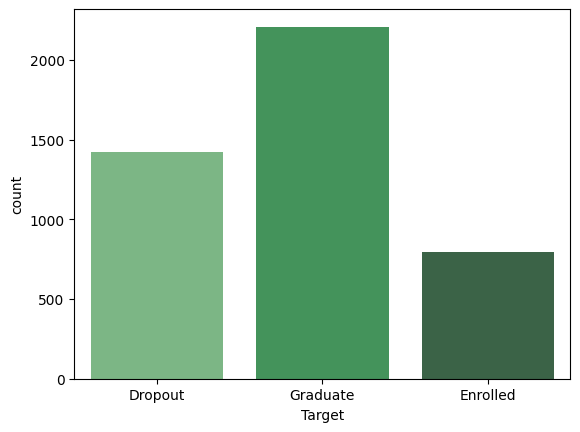

In [4]:
# countplot for target
sns.countplot(x="Target", data=df, palette="Greens_d");

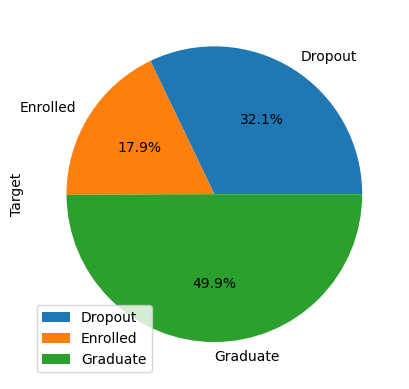

In [5]:
pd.crosstab(df.Target, ['Target']).plot(kind='pie', subplots=True, autopct='%1.1f%%');

In [6]:
temp = df.groupby('Target').count()['Marital status'].reset_index().sort_values(by='Marital status', ascending=False)
temp.style.background_gradient(cmap='Purples')

,Target,Marital status
2,Graduate,2209
0,Dropout,1421
1,Enrolled,794


In [7]:
temp1 = pd.crosstab(index=df['Marital status'], columns=df.Target, margins=True)
temp1.style.background_gradient(cmap='Purples')

Target,Dropout,Enrolled,Graduate,All
Marital status,,,,
1,1184,720,2015,3919
2,179,52,148,379
3,1,2,1,4
4,42,16,33,91
5,11,3,11,25
6,4,1,1,6
All,1421,794,2209,4424


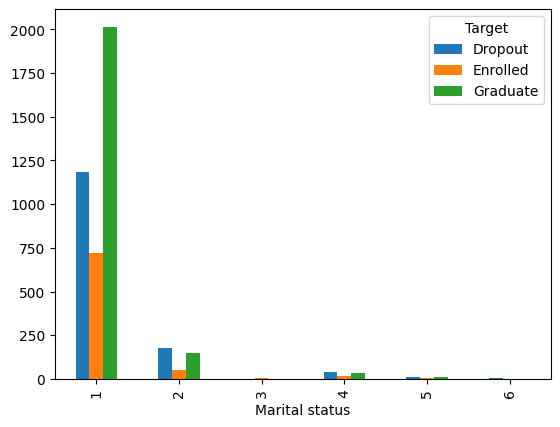

In [8]:
pd.crosstab(index=df['Marital status'], columns=df.Target).plot(kind='bar');

In [9]:
pd.crosstab(df.Target, df['Application mode'], margins=True).style.background_gradient(cmap='Purples');

<Axes: xlabel='Application mode', ylabel='count'>

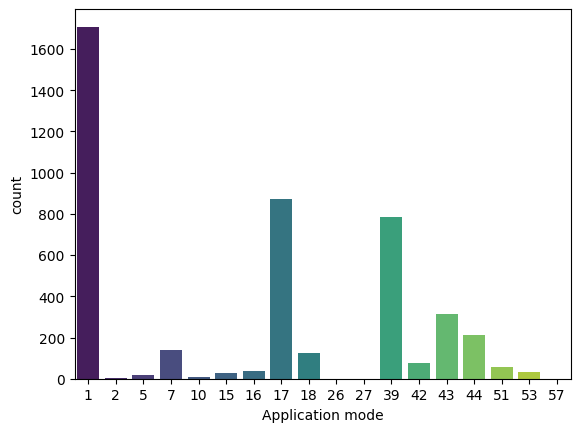

In [10]:
sns.countplot(x=df['Application mode'], data=df, palette='viridis')

In [11]:
pd.crosstab(df.Target, df.Course, margins=True).style.background_gradient(cmap='Reds')

Course,33,171,8014,9003,9070,9085,9119,9130,9147,9238,9254,9500,9556,9670,9773,9853,9991,All
Target,,,,,,,,,,,,,,,,,,
Dropout,8,82,71,86,51,90,92,78,134,65,96,118,33,95,101,85,136,1421
Enrolled,3,37,21,37,42,75,64,21,108,42,41,100,17,48,34,50,54,794
Graduate,1,96,123,87,133,172,14,42,138,248,115,548,36,125,196,57,78,2209
All,12,215,215,210,226,337,170,141,380,355,252,766,86,268,331,192,268,4424


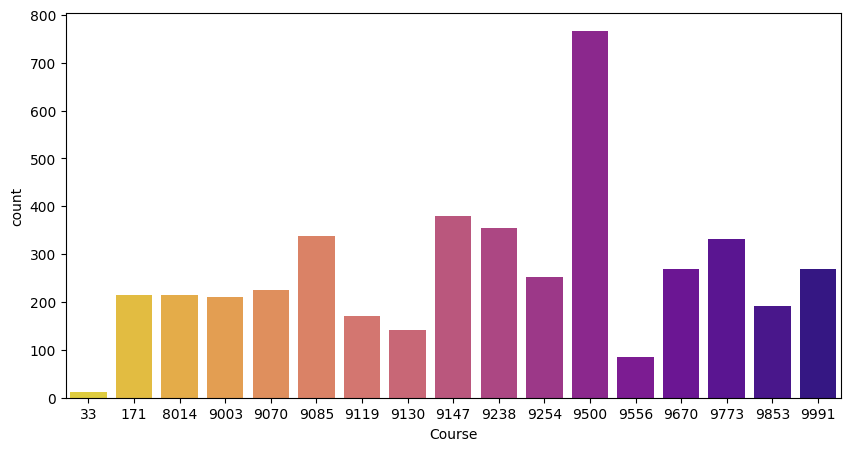

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x=df['Course'], data=df, palette='plasma_r', ax=ax);

In [13]:
pd.crosstab(df.Target, df['Daytime/evening attendance\t'], margins=True).style.background_gradient(cmap='Blues')

Daytime/evening attendance,0,1,All
Target,,,
Dropout,207,1214,1421
Enrolled,75,719,794
Graduate,201,2008,2209
All,483,3941,4424


/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


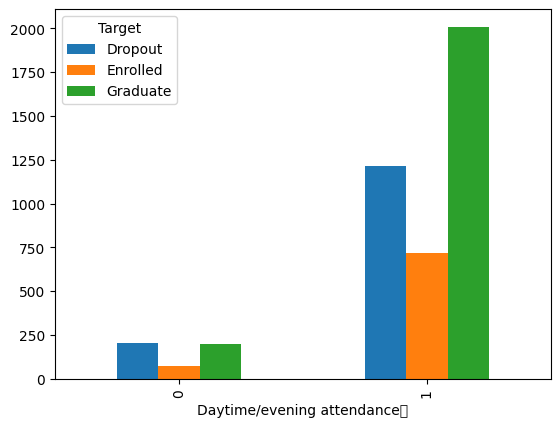

In [14]:
pd.crosstab(index=df['Daytime/evening attendance\t'], columns=df.Target).plot(kind='bar');

In [15]:
df1 = df.copy()
df1['Target'] = df1['Target'].map({'Enrolled':2, 'Graduate':1, 'Dropout':0})

/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


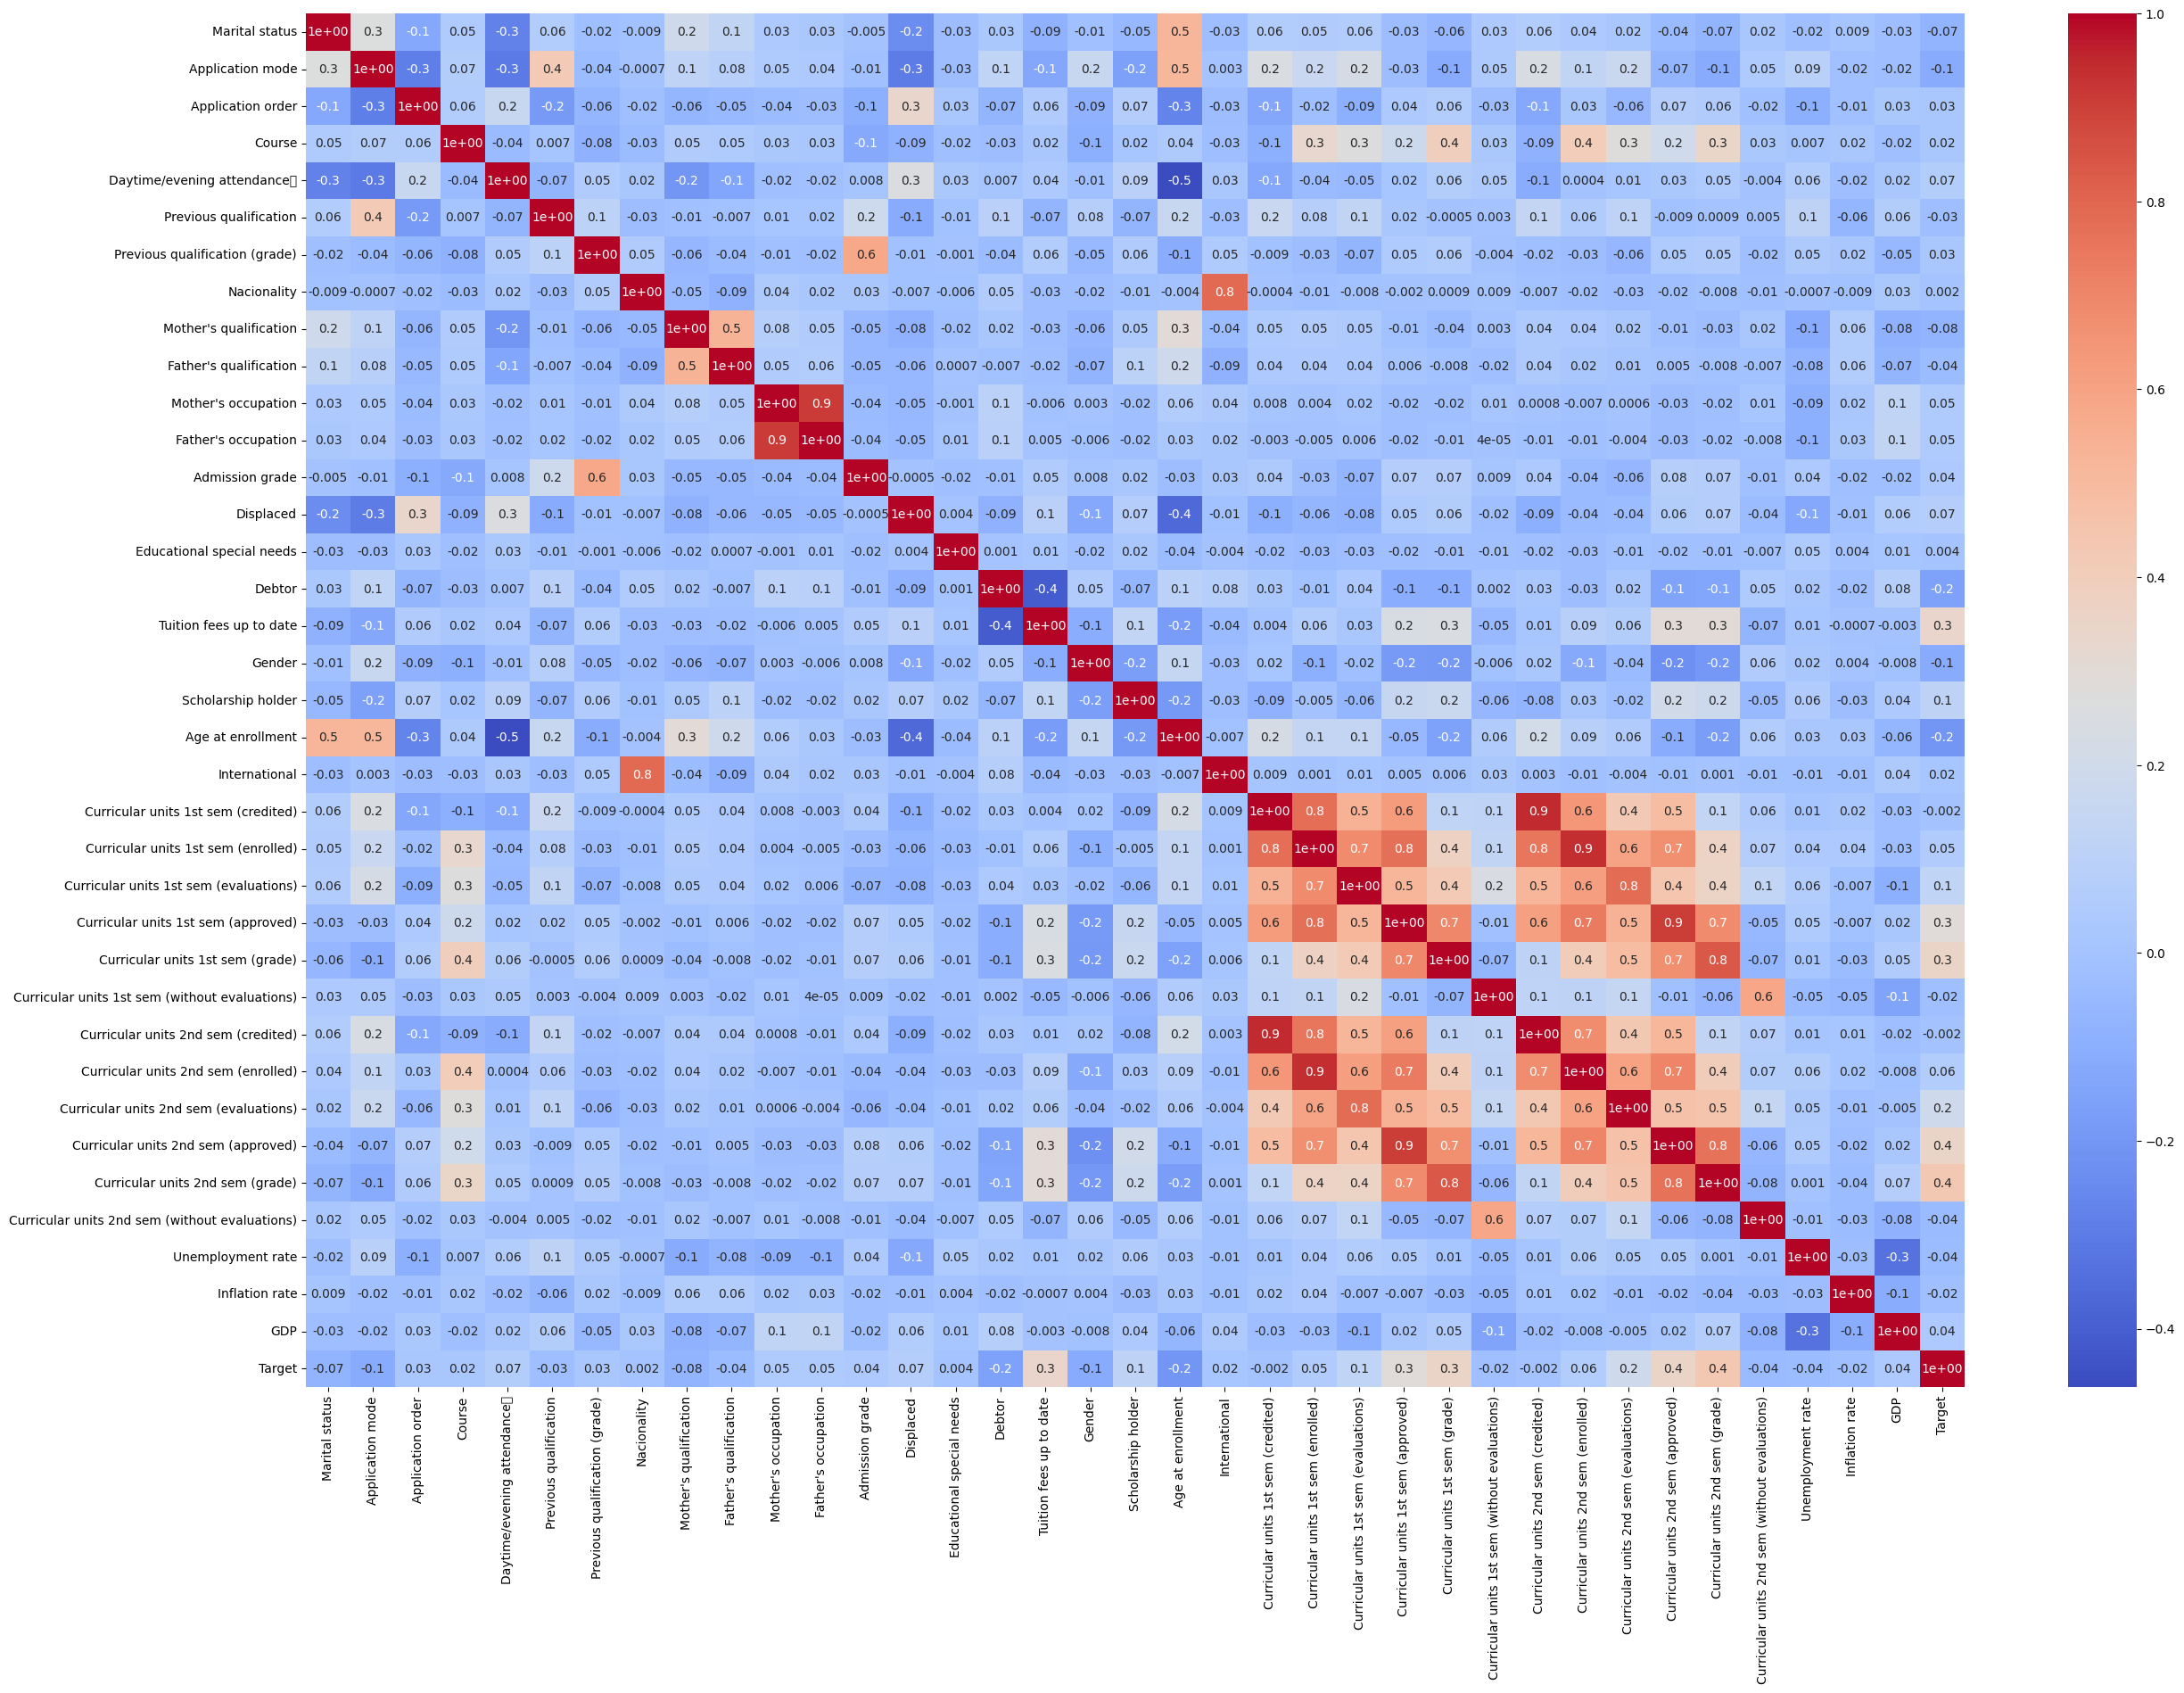

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(30,20))
sns.heatmap(df1.corr(), cmap='coolwarm', annot=True, ax=ax, fmt='0.1');

In [17]:
cor_matrix = df1.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [col for col in upper_tri.columns if any(upper_tri[col]>0.9)]

print(to_drop)

["Father's occupation", 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)']


/tmp/ipykernel_20/2821858895.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [18]:
df2 = df1.drop(["Father's occupation", 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)','Inflation rate','GDP'], axis=1)
df2.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0.000000,0,10.8,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,6,13.666667,0,13.9,1
2,1,1,5,9070,1,1,122.0,1,37,37,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,0.000000,0,10.8,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,10,12.400000,0,9.4,1
4,2,39,1,8014,0,1,100.0,1,37,38,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,6,13.000000,0,13.9,1


In [19]:
X = df2.iloc[:, :-1]
y = df2['Target']
print(f"The shape of X: {X.shape}")
print(f"The shape of y: {y.shape}")

The shape of X: (4424, 30)
The shape of y: (4424,)


### use SKlearn for selcting the features with the highest scores


In [20]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
X_new = SelectKBest(chi2, k=20).fit_transform(X,y)
X_new[0]

array([ 17. , 171. ,   1. ,  19. ,  12. ,   5. , 127.3,   0. ,   1. ,
         1. ,   0. ,  20. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ])

In [21]:
selected_features = X.columns[SelectKBest(f_classif, k=20).fit(X, y).get_support()]
print(selected_features)

Index(['Marital status', 'Application mode', 'Application order',
       'Daytime/evening attendance\t', 'Previous qualification (grade)',
       'Mother's qualification', 'Admission grade', 'Displaced', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)'],
      dtype='object')


In [22]:
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifierCV
# from sklearn.inspection import DecisionBoundaryDisplay

In [23]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

In [24]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=15, max_features=15, random_state=42),
    MLPClassifier(hidden_layer_sizes=(300,),activation='relu',solver='sgd',learning_rate='adaptive',alpha=1, max_iter=1000,random_state=42),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# iterate over classifiers

def classifier_score(names, classifiers):
    results = {"name":[],
              "score": []}
    i = 1
    for name, clf in zip(names, classifiers):
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(f"classifier {name}: has score {score}")
        results["name"].append(name)
        results["score"].append(score)
  
    return results


In [27]:
data = classifier_score(names, classifiers)

classifier Nearest Neighbors: has score 0.6536144578313253
classifier Linear SVM: has score 0.7341867469879518
classifier RBF SVM: has score 0.48268072289156627
classifier Gaussian Process: has score 0.7213855421686747
classifier Decision Tree: has score 0.7454819277108434
classifier Random Forest: has score 0.7567771084337349
classifier Neural Net: has score 0.7469879518072289
classifier AdaBoost: has score 0.6746987951807228
classifier Naive Bayes: has score 0.7010542168674698


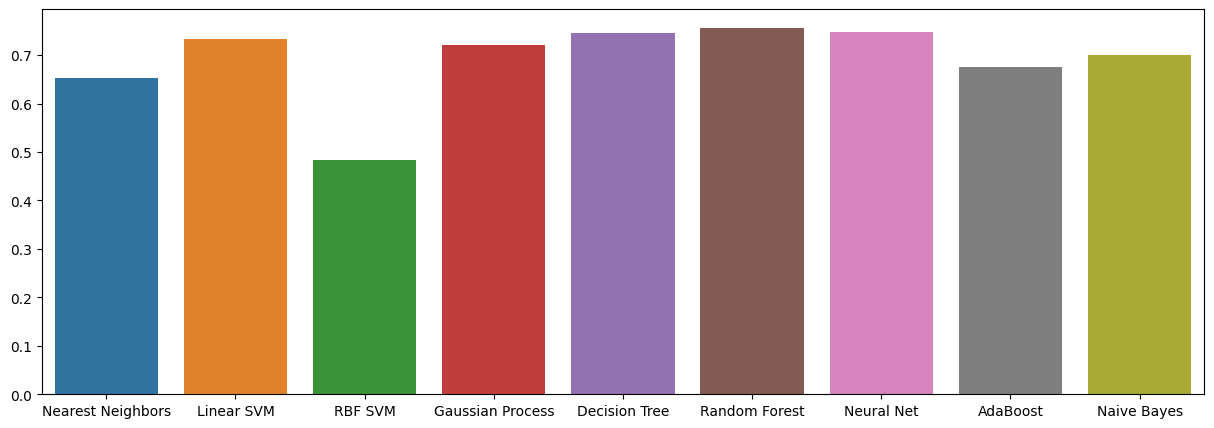

In [28]:
fig ,ax = plt.subplots(figsize=(15,5)) 
sns.barplot(x="name", y="score", data=data, ax=ax );

In [29]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, f1_score

In [30]:
rfc = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=15)
rfc.fit(X_train, y_train)
y_pred = rfc.predict_proba(X)
roc1 = roc_auc_score(y, y_pred, multi_class='ovr')
print(roc1)
roc2 = roc_auc_score(y, y_pred, multi_class='ovo')
print(roc2)


0.8739632014196891
0.8587780545276503
